# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
!pip install typing-extensions --upgrade
!pip install nb_black 
!pip install ipywidgets==7.4.2

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.5 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 6.2 MB/s  eta 0:00:01
     |████████████████████████████████| 843 kB 40.5 MB/s eta 0:00:01
  Created wheel for nb-black: filename=nb_black-1.0.7-py3-none-any.whl size=5280 sha256=64568864610bd62497e2ca9fc2ca742d6ed0f2281354e01080e161b262066ec3
  Stored in directory: /root/.cache/pip/wheels/1e/b2/88/51c66d23ea5fd0d40ed50997555e15d981d92671376a9a412a
Successfully built nb-black
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 111 kB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 17.1 MB/s eta 0:00:01     |███████████████

In [1]:
%load_ext nb_black

## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets

<IPython.core.display.Javascript object>

In [3]:
# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
)

# Create training set and define training dataloader
## YOUR CODE HERE ##
training_data = datasets.MNIST(
    root="data", train=True, download=True, transform=transform
)
train_loader = DataLoader(training_data, batch_size=64, shuffle=True)

# Create test set and define test dataloader
## YOUR CODE HERE ##
test_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=1000)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


<IPython.core.display.Javascript object>

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**I chose this transformer in order to normalize each image data to have zero mean and a standard deviation of 1. I selected this way as this is known to facilitate neural network training**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

<IPython.core.display.Javascript object>

--------------------Training Data--------------------
7


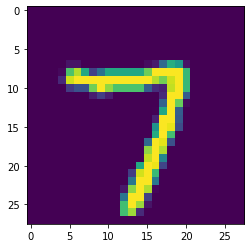

5


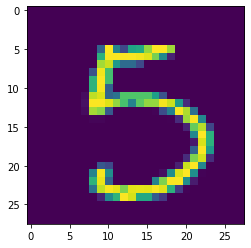

7


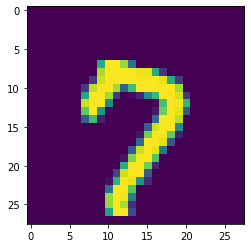

2


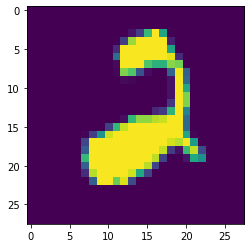

3


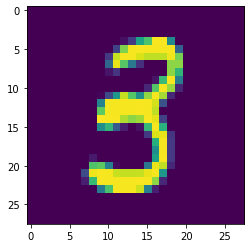


--------------------Testing Data--------------------
7


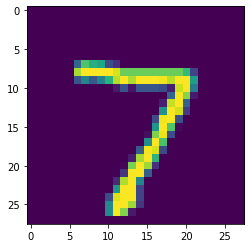

2


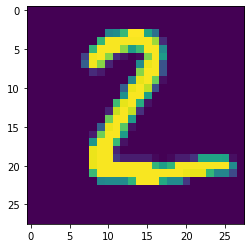

1


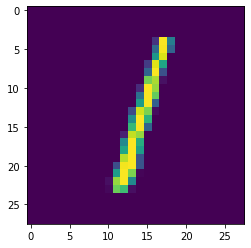

0


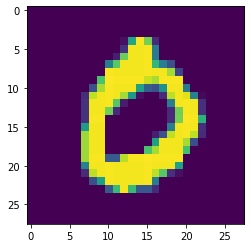

4


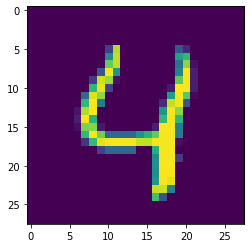

<IPython.core.display.Javascript object>

In [5]:
# Explore data
## YOUR CODE HERE ##
print(f"{'-'*20}Training Data{'-'*20}")
show5(train_loader)

print(f"\n{'-'*20}Testing Data{'-'*20}")
show5(test_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [6]:
training_data.data.shape

torch.Size([60000, 28, 28])

<IPython.core.display.Javascript object>

In [7]:
## YOUR CODE HERE ##
# Define the class for your neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu  ## YOUR CODE HERE ##
        self.layer1 = nn.Linear(28 * 28, 128)  ## YOUR CODE HERE ##
        self.layer2 = nn.Linear(128, 64)  ## YOUR CODE HERE ##
        self.layer3 = nn.Linear(64, 10)  ## YOUR CODE HERE ##

    def forward(self, x):
        x = torch.flatten(x, 1)  # flatten all dimensions except batch
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.layer3(x)
        return x


# Instantiate the model
net = Net()

<IPython.core.display.Javascript object>

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [8]:
## YOUR CODE HERE ##
optimizer = optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

<IPython.core.display.Javascript object>

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [35]:
## YOUR CODE HERE ##
num_epochs = 10

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(
        f"Epoch {epoch + 1} training accuracy: {train_correct*100/len(train_loader.dataset):.2f}% training loss: {train_loss/len(train_loader):.5f}"
    )
    train_loss_history.append(train_loss / len(train_loader))

    val_loss = 0.0
    val_correct = 0
    net.eval()
    for inputs, labels in test_loader:
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(
        f"Epoch {epoch + 1} validation accuracy: {val_correct*100/len(test_loader.dataset):.2f}% validation loss: {val_loss/len(test_loader):.5f}"
    )
    val_loss_history.append(val_loss / len(test_loader))

Epoch 1 training accuracy: 99.27% training loss: 0.02207
Epoch 1 validation accuracy: 97.90% validation loss: 0.08817
Epoch 2 training accuracy: 99.40% training loss: 0.01678
Epoch 2 validation accuracy: 97.60% validation loss: 0.10785
Epoch 3 training accuracy: 99.38% training loss: 0.01791
Epoch 3 validation accuracy: 97.74% validation loss: 0.09939
Epoch 4 training accuracy: 99.45% training loss: 0.01594
Epoch 4 validation accuracy: 97.58% validation loss: 0.12111
Epoch 5 training accuracy: 99.44% training loss: 0.01703
Epoch 5 validation accuracy: 97.80% validation loss: 0.09746
Epoch 6 training accuracy: 99.50% training loss: 0.01452
Epoch 6 validation accuracy: 97.78% validation loss: 0.10514
Epoch 7 training accuracy: 99.50% training loss: 0.01491
Epoch 7 validation accuracy: 97.47% validation loss: 0.11581
Epoch 8 training accuracy: 99.51% training loss: 0.01403
Epoch 8 validation accuracy: 97.75% validation loss: 0.12458
Epoch 9 training accuracy: 99.54% training loss: 0.01275

<IPython.core.display.Javascript object>

Plot the training loss (and validation loss/accuracy, if recorded).

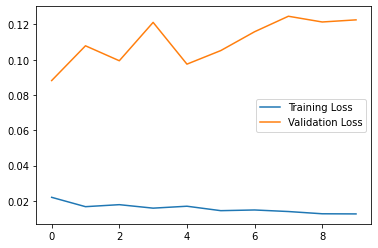

<IPython.core.display.Javascript object>

In [36]:
## YOUR CODE HERE ##
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [37]:
## YOUR CODE HERE ##
val_correct = 0
for inputs, labels in test_loader:
    if torch.cuda.is_available():
        inputs, labels = inputs.cuda(), labels.cuda()

    outputs = net(inputs)

    _, preds = torch.max(outputs.data, 1)
    val_correct += (preds == labels).sum().item()
print(f"Validation accuracy: {val_correct*100/len(test_loader.dataset):.2f}% ")

Validation accuracy: 97.94% 


<IPython.core.display.Javascript object>

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [49]:
## YOUR CODE HERE ##
# Define the class for your neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu  ## YOUR CODE HERE ##
        self.layer1 = nn.Linear(28 * 28, 256)  ## YOUR CODE HERE ##
        self.layer2 = nn.Linear(256, 128)  ## YOUR CODE HERE ##
        self.layer3 = nn.Linear(128, 64)  ## YOUR CODE HERE ##
        self.layer4 = nn.Linear(64, 10)  ## YOUR CODE HERE ##

    def forward(self, x):
        x = torch.flatten(x, 1)  # flatten all dimensions except batch
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.layer4(x)
        return x


# Instantiate the model
net = Net()

<IPython.core.display.Javascript object>

In [50]:
## YOUR CODE HERE ##
optimizer = optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

<IPython.core.display.Javascript object>

In [51]:
## YOUR CODE HERE ##
num_epochs = 10

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(
        f"\nEpoch {epoch + 1} training accuracy: {train_correct*100/len(train_loader.dataset):.2f}% training loss: {train_loss/len(train_loader):.5f}"
    )
    train_loss_history.append(train_loss / len(train_loader))

    val_loss = 0.0
    val_correct = 0
    net.eval()
    for inputs, labels in test_loader:
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(
        f"Epoch {epoch + 1} validation accuracy: {val_correct*100/len(test_loader.dataset):.2f}% validation loss: {val_loss/len(test_loader):.5f}"
    )
    val_loss_history.append(val_loss / len(test_loader))


Epoch 1 training accuracy: 92.18% training loss: 0.25355
Epoch 1 validation accuracy: 96.44% validation loss: 0.11454

Epoch 2 training accuracy: 96.94% training loss: 0.10051
Epoch 2 validation accuracy: 97.03% validation loss: 0.09457

Epoch 3 training accuracy: 97.75% training loss: 0.07086
Epoch 3 validation accuracy: 96.70% validation loss: 0.10112

Epoch 4 training accuracy: 98.22% training loss: 0.05386
Epoch 4 validation accuracy: 97.46% validation loss: 0.08318

Epoch 5 training accuracy: 98.62% training loss: 0.04382
Epoch 5 validation accuracy: 97.84% validation loss: 0.07360

Epoch 6 training accuracy: 98.76% training loss: 0.03753
Epoch 6 validation accuracy: 97.48% validation loss: 0.09236

Epoch 7 training accuracy: 98.97% training loss: 0.03224
Epoch 7 validation accuracy: 98.07% validation loss: 0.07501

Epoch 8 training accuracy: 99.14% training loss: 0.02619
Epoch 8 validation accuracy: 97.83% validation loss: 0.07842

Epoch 9 training accuracy: 99.24% training loss

<IPython.core.display.Javascript object>

## Saving your model
Using `torch.save`, save your model for future loading.

In [54]:
## YOUR CODE HERE ##
torch.save(net.state_dict(), "results/model.pth")

<IPython.core.display.Javascript object>